## 1. 提取數據並構建初始數據幀 (DataFrame)

首先，使用適當的數據類型，從數據集中為每個房間分別構建溫度和濕度數據幀，並將數值取整至小數點後2位。

In [1]:
# 導入必要的工具包以進行數據操作和可視化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings

In [2]:
# 為房間02-412的溫度數據建立數據幀
Temp_Cel_02_412 = pd.read_csv('ES_B_02_412_3E68_temp.txt', names = ('Date & Time', 'Temperature (°C)'), engine = 'python')
Temp_Cel_02_412['Date & Time'] = pd.to_datetime(Temp_Cel_02_412['Date & Time'])
Temp_Cel_02_412['Temperature (°C)'] = round(Temp_Cel_02_412['Temperature (°C)'].astype('float64'),2)

# 為房間02-412的濕度數據建立數據幀
Huma_02_412 = pd.read_csv('ES_B_02_412_3E68_huma.txt', names = ('Date & Time', 'Humidity (%)'), engine = 'python')
Huma_02_412['Date & Time'] = pd.to_datetime(Huma_02_412['Date & Time'])
Huma_02_412['Humidity (%)'] = round(Huma_02_412['Humidity (%)'].astype('float64'),2)

# 為房間12-431的溫度數據建立數據幀
Temp_Cel_12_431 = pd.read_csv('ES_B_12_431_7BC2_temp.txt', names = ('Date & Time', 'Temperature (°C)'), engine = 'python')
Temp_Cel_12_431['Date & Time'] = pd.to_datetime(Temp_Cel_12_431['Date & Time'])
Temp_Cel_12_431['Temperature (°C)'] = round(Temp_Cel_12_431['Temperature (°C)'].astype('float64'),2)

# 為房間12-431的濕度數據建立數據幀
Huma_12_431 = pd.read_csv('ES_B_12_431_7BC2_huma.txt', names = ('Date & Time', 'Humidity (%)'), engine = 'python')
Huma_12_431['Date & Time'] = pd.to_datetime(Huma_12_431['Date & Time'])
Huma_12_431['Humidity (%)'] = round(Huma_12_431['Humidity (%)'].astype('float64'),2)

# 檢查數據幀
display(Temp_Cel_02_412.sample(5), Huma_02_412.tail(), Temp_Cel_12_431.head(), Huma_12_431.tail())

,Date & Time,Temperature (°C)
2911,2021-05-15 12:13:38,21.39
9155,2021-06-15 19:52:27,19.32
3003,2021-05-15 23:11:07,19.97
16069,2021-07-20 11:02:37,22.39
6970,2021-06-04 20:49:18,21.55


,Date & Time,Humidity (%)
18169,2021-07-30 23:26:57,35.10
18170,2021-07-30 23:34:01,34.74
18171,2021-07-30 23:41:05,33.73
18172,2021-07-30 23:48:09,33.00
18173,2021-07-30 23:55:13,32.71


,Date & Time,Temperature (°C)
0,2021-05-01 00:05:11,21.58
1,2021-05-01 00:12:14,21.16
2,2021-05-01 00:19:19,22.39
3,2021-05-01 00:26:22,22.16
4,2021-05-01 00:33:26,21.87


,Date & Time,Humidity (%)
18200,2021-07-30 23:25:03,29.47
18201,2021-07-30 23:32:07,29.34
18202,2021-07-30 23:39:11,28.77
18203,2021-07-30 23:46:15,28.44
18204,2021-07-30 23:53:18,27.78


In [3]:
# 檢查數據列的數據類型和數據幀形狀
print(Temp_Cel_02_412.dtypes, '\n', Huma_02_412.shape, '\n', Temp_Cel_12_431.shape)

Date & Time         datetime64[ns]
Temperature (°C)           float64
dtype: object 
 (18174, 2) 
 (18205, 2)


In [4]:
# 以「日期和時間」（Date & Time）列為主鍵，合併每個房間的溫度和濕度數據幀
Temp_Cel_Huma_02_412 = pd.merge(Temp_Cel_02_412, Huma_02_412, on = 'Date & Time', how='inner')
Temp_Cel_Huma_12_431 = pd.merge(Temp_Cel_12_431, Huma_12_431, on = 'Date & Time', how='inner')

print(Temp_Cel_Huma_02_412.sample(5), '\n', Temp_Cel_Huma_12_431.sample(5))

              Date & Time  Temperature (°C)  Humidity (%)
91    2021-05-01 10:58:22             21.94         58.78
17126 2021-07-25 18:11:45             18.13         24.26
7976  2021-06-09 21:22:36             19.52         34.32
16358 2021-07-21 21:48:20             18.00         35.22
8628  2021-06-13 04:27:51             17.65         37.72 
               Date & Time  Temperature (°C)  Humidity (%)
57    2021-05-01 06:48:05             20.77         52.97
11861 2021-06-29 07:15:54             20.03         39.87
9349  2021-06-16 19:15:10             20.90         42.02
13789 2021-07-08 23:09:20             20.10         39.66
4279  2021-05-22 11:36:42             21.48         37.67


## 2. 對數據進行分類

根據ASHRAE（美國採暖製冷空調工程師協會）有關熱舒適規範標準，將數據分類到新列中，即在冬季的室內環境，「舒適」溫度範圍為68 °F 至 74 °F（~ 20 °C - 23.5 °C），相對濕度範圍為 30% - 60%。

https://www7.nau.edu/itep/main/eeop/docs/airqlty/AkIAQ_ThermalComfort.pdf

In [5]:
# 設置溫度和濕度類別的界線 
temp_acce_lower_lim=20.00
temp_acce_upper_lim=23.50
huma_acce_lower_lim=30.00
huma_acce_upper_lim=60.00

bins_Temp_Winter = [0, temp_acce_lower_lim, temp_acce_upper_lim, np.inf]
bins_Huma = [0, huma_acce_lower_lim, huma_acce_upper_lim, np.inf]
Temp_categories_indoor = ['Low Temp', 'Acceptable Temp','High Temp']
Huma_categories_indoor = ['Dry', 'Acceptable Huma','Wet']

# 將數據分類到新列中
Temp_Cel_Huma_02_412['Temp_cats'] = pd.cut(Temp_Cel_Huma_02_412['Temperature (°C)'], bins_Temp_Winter, labels = Temp_categories_indoor)
Temp_Cel_Huma_02_412['Huma_cats'] = pd.cut(Temp_Cel_Huma_02_412['Humidity (%)'], bins_Huma, labels = Huma_categories_indoor)

Temp_Cel_Huma_12_431['Temp_cats'] = pd.cut(Temp_Cel_Huma_12_431['Temperature (°C)'], bins_Temp_Winter, labels = Temp_categories_indoor)
Temp_Cel_Huma_12_431['Huma_cats'] = pd.cut(Temp_Cel_Huma_12_431['Humidity (%)'], bins_Huma, labels = Huma_categories_indoor)

# 顯示每個類別數的數量，並檢查數據類型
print(f"02_412_Temp_cats: \n{Temp_Cel_Huma_02_412['Temp_cats'].value_counts()}\n\n02_412_Huma_cats: \n{Temp_Cel_Huma_02_412['Huma_cats'].value_counts()}\n\n12_431_Temp_cats: \n{Temp_Cel_Huma_12_431['Temp_cats'].value_counts()}\n\n12_431_Huma_cats: \n{Temp_Cel_Huma_12_431['Huma_cats'].value_counts()}\n\nData types: \n{Temp_Cel_Huma_02_412.dtypes}")

02_412_Temp_cats: 
Low Temp           8430
Acceptable Temp    8317
High Temp          1427
Name: Temp_cats, dtype: int64

02_412_Huma_cats: 
Acceptable Huma    16420
Wet                  877
Dry                  877
Name: Huma_cats, dtype: int64

12_431_Temp_cats: 
Acceptable Temp    12527
Low Temp            5676
High Temp              2
Name: Temp_cats, dtype: int64

12_431_Huma_cats: 
Acceptable Huma    13653
Dry                 4490
Wet                   62
Name: Huma_cats, dtype: int64

Data types: 
Date & Time         datetime64[ns]
Temperature (°C)           float64
Humidity (%)               float64
Temp_cats                 category
Huma_cats                 category
dtype: object


In [6]:
# 再次檢查每個房間的數據幀形狀
print(Temp_Cel_Huma_02_412.shape, '\n', Temp_Cel_Huma_12_431.shape)

(18174, 5) 
 (18205, 5)


## 3. 將所有溫度和濕度數據幀合併（merge）為一

### 3.1 在合併之前，比較數據幀中的「時間差」（Time_Diff）

可見，由於兩個數據幀在同一時期內的記錄行數不同（可能是由於每個傳感器的維護/校準的時間差異），因此，它們都不能被粗略地選擇為合併函數中的「左表」。

為了將兩者合併為更均勻的數據幀，所有記錄之間的「時間差」值將被計算為新列，「時間差」列中具有較小標準差（Standard Deviation, STD）的數據幀將是一個更均勻的數據框（所有數據分佈更接近平均值）。

In [7]:
# 分別計算兩個數據幀的記錄之間的時間差
Temp_Cel_Huma_02_412['Time_Diff'] = Temp_Cel_Huma_02_412['Date & Time'].diff().fillna(pd.Timedelta(seconds=0))
Temp_Cel_Huma_12_431['Time_Diff'] = Temp_Cel_Huma_12_431['Date & Time'].diff().fillna(pd.Timedelta(seconds=0))

display(Temp_Cel_Huma_02_412.tail(), Temp_Cel_Huma_12_431.head())

,Date & Time,Temperature (°C),Humidity (%),Temp_cats,Huma_cats,Time_Diff
18169,2021-07-30 23:26:57,19.68,35.10,Low Temp,Acceptable Huma,0 days 00:07:04
18170,2021-07-30 23:34:01,22.52,34.74,Acceptable Temp,Acceptable Huma,0 days 00:07:04
18171,2021-07-30 23:41:05,18.39,33.73,Low Temp,Acceptable Huma,0 days 00:07:04
18172,2021-07-30 23:48:09,21.06,33.00,Acceptable Temp,Acceptable Huma,0 days 00:07:04
18173,2021-07-30 23:55:13,18.10,32.71,Low Temp,Acceptable Huma,0 days 00:07:04


,Date & Time,Temperature (°C),Humidity (%),Temp_cats,Huma_cats,Time_Diff
0,2021-05-01 00:05:11,21.58,54.02,Acceptable Temp,Acceptable Huma,0 days 00:00:00
1,2021-05-01 00:12:14,21.16,54.18,Acceptable Temp,Acceptable Huma,0 days 00:07:03
2,2021-05-01 00:19:19,22.39,54.23,Acceptable Temp,Acceptable Huma,0 days 00:07:05
3,2021-05-01 00:26:22,22.16,54.27,Acceptable Temp,Acceptable Huma,0 days 00:07:03
4,2021-05-01 00:33:26,21.87,54.25,Acceptable Temp,Acceptable Huma,0 days 00:07:04


In [8]:
# 檢查兩個 'Time_Diff' 列的描述性統計（Descriptive Statistics）
print(Temp_Cel_Huma_02_412['Time_Diff'].describe(), '\n\n', Temp_Cel_Huma_12_431['Time_Diff'].describe())

count                        18174
mean     0 days 00:07:12.598987564
std      0 days 00:01:00.928074890
min                0 days 00:00:00
25%                0 days 00:07:04
50%                0 days 00:07:04
75%                0 days 00:07:04
max                0 days 00:21:17
Name: Time_Diff, dtype: object 

 count                        18205
mean     0 days 00:07:11.842186212
std      0 days 00:00:57.698448356
min                0 days 00:00:00
25%                0 days 00:07:04
50%                0 days 00:07:04
75%                0 days 00:07:04
max                0 days 00:21:19
Name: Time_Diff, dtype: object


### 3.2 為「merge_asof」函數選定「左表」

房間12-431 的標準差為大約 57.70 秒，而在房間02-412中為超過一分鐘。

因此，選擇房間12-431 的數據幀作為 merge_asof 函數中的「左表」。

In [9]:
# 刪除 'Time_Diff' 列，因為對未來的計算不相關
Temp_Cel_Huma_02_412 = Temp_Cel_Huma_02_412.drop('Time_Diff', axis = 1)
Temp_Cel_Huma_12_431 = Temp_Cel_Huma_12_431.drop('Time_Diff', axis = 1)

In [10]:
# 在兩個數據幀上應用 merge_asof 函數，並使用房間12-431 作為「左表」，然後重新排序列
all_Temp_Huma = pd.merge_asof(Temp_Cel_Huma_12_431, Temp_Cel_Huma_02_412, on = ['Date & Time'], direction = 'nearest', suffixes=['_12_431', '_02_412'])

# 重新排序列
re_ordered_cols = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 
                   'Temperature (°C)_12_431', 'Humidity (%)_12_431', 'Temp_cats_12_431', 'Huma_cats_12_431']

all_Temp_Huma = all_Temp_Huma[re_ordered_cols]

print(all_Temp_Huma.shape)
all_Temp_Huma.sample(5)

(18205, 9)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431
13775,2021-07-08 21:23:14,19.71,46.41,Low Temp,Acceptable Huma,20.84,38.41,Acceptable Temp,Acceptable Huma
8022,2021-06-10 04:24:20,18.48,35.99,Low Temp,Acceptable Huma,19.03,30.73,Low Temp,Acceptable Huma
4885,2021-05-25 12:18:09,20.35,49.55,Acceptable Temp,Acceptable Huma,21.61,43.46,Acceptable Temp,Acceptable Huma
6642,2021-06-03 06:22:19,19.39,49.50,Low Temp,Acceptable Huma,20.26,42.39,Acceptable Temp,Acceptable Huma
16319,2021-07-21 14:20:40,17.45,31.17,Low Temp,Acceptable Huma,20.48,24.70,Acceptable Temp,Dry


## 4. 數據類別及趨勢的可視化

現在，我們可以在圖表中沿著相同的「日期和時間」列繪製溫度和濕度數據的趨勢，以及本項目早前提到的 ASHRAE 指南建議的「舒適」溫度和濕度的範圍界線。

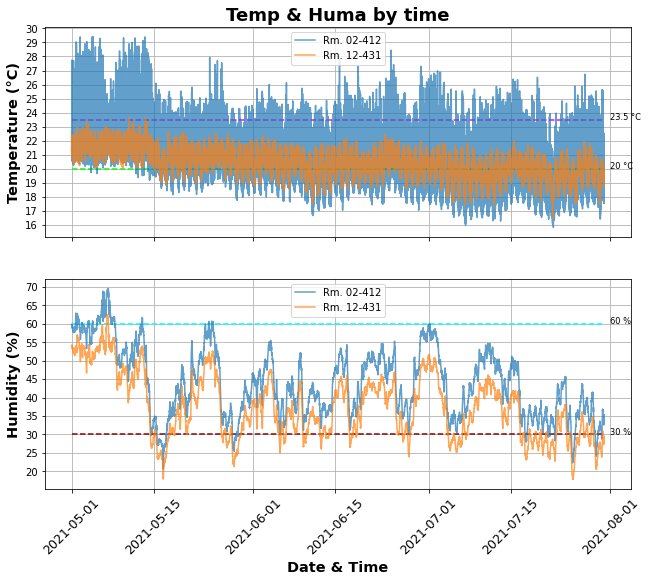

In [11]:
# 兩個房間的「日期和時間」相對溫度和濕度數據的可視化
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

fig.set_size_inches(10.5, 8.5)
colour = 'white' ## ！！！使用「夜間模式」/「深色主題」時替換兩種顏色
colour_2 = 'black'

# 編輯兩個圖表的外觀
ax1.set_title('Temp & Huma by time', color=colour_2, fontsize=18, fontweight='heavy')
ax1.spines['bottom'].set_color(colour_2)
ax1.spines['top'].set_color(colour_2)
ax1.set_ylabel('Temperature (°C)', fontweight ='bold', color = colour_2, fontsize=14.5)
ax1.tick_params(colors=colour_2)
ax1.grid(True)
ax1.locator_params('y', nbins=15)

ax2.spines['bottom'].set_color(colour_2)
ax2.spines['top'].set_color(colour_2)
ax2.set_xlabel('Date & Time', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.set_ylabel('Humidity (%)', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.tick_params(colors=colour_2)
ax2.grid(True)
ax2.locator_params('y', nbins=15)
plt.xticks(rotation = 45, fontsize=12.5)

# 繪製圖表
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Temperature (°C)_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Temperature (°C)_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax1.legend(fontsize='medium', loc=9)
ax1.hlines(y=temp_acce_lower_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='lime', linestyles='dashed')
ax1.hlines(y=temp_acce_upper_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='magenta', linestyles='dashed')
ax1.text('2021-08-01', temp_acce_lower_lim,'20 °C', fontsize='small')
ax1.text('2021-08-01', temp_acce_upper_lim,'23.5 °C', fontsize='small')

ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Humidity (%)_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Humidity (%)_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax2.legend(fontsize='medium', loc=9)
ax2.hlines(y=huma_acce_lower_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='darkred', linestyles='dashed')
ax2.hlines(y=huma_acce_upper_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='cyan', linestyles='dashed')
ax2.text('2021-08-01', huma_acce_lower_lim,'30 %', fontsize='small')
ax2.text('2021-08-01', huma_acce_upper_lim,'60 %', fontsize='small')

plt.show()

### 趨勢調查結果

- 房間12.431 的溫度數據的波動性低於房間02.412，然而，兩個數據集的溫度都顯著下降到低於 20 °C。


- 兩個房間的濕度數據以約為 8% 的差異遵循相似的趨勢，看似很大部分落入 30%-60%（可接受的濕度範圍）。

這表明兩個房間的空調系統不能充分調節室內溫度到「令人滿意」的程度，因為在2021 年 5 月上半月中，室外溫度明顯低於房間02-412 的室內溫度，相反從 2021 年 5 月 15 日起直到 2021 年 7 月底，兩個房間的溫度逐漸降至 20°C 以下，對於從事數據/分析工作的人員來說，可能這兩個房間都不能成為理想的處所/工作環境。

天氣的歷史數據來源：

https://www.timeanddate.com/weather/australia/sydney/historic?month=5&year=2021

https://www.timeanddate.com/weather/australia/sydney/historic?month=7&year=2021

       Temperature (°C)_02_412  Temperature (°C)_12_431
count             18205.000000             18205.000000
mean                 20.429939                20.441938
std                   2.056292                 0.949141
min                  15.840000                16.480000
25%                  18.900000                19.840000
50%                  20.290000                20.480000
75%                  21.710000                21.100000
max                  29.420000                23.650000
       Humidity (%)_02_412  Humidity (%)_12_431
count         18205.000000         18205.000000
mean             43.878452            37.377987
std               9.445582             8.776173
min              20.720000            17.810000
25%              36.000000            30.070000
50%              43.170000            36.390000
75%              50.760000            43.620000
max              69.580000            62.420000


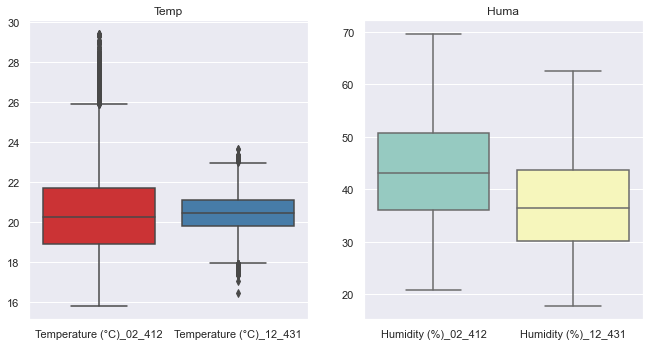

In [12]:
# 以箱線圖把兩個房間的溫度和濕度數據的描述性統計進行可視化
sns.set(rc={'figure.figsize':(11,5.5)})

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1 = sns.boxplot(data=all_Temp_Huma[['Temperature (°C)_02_412', 'Temperature (°C)_12_431']], palette='Set1', ax=ax1)
ax2 = sns.boxplot(data=all_Temp_Huma[['Humidity (%)_02_412', 'Humidity (%)_12_431']], palette='Set3', ax=ax2)

ax1.set_title('Temp')
ax2.set_title('Huma')

print(all_Temp_Huma[['Temperature (°C)_02_412', 'Temperature (°C)_12_431']].describe())
print(all_Temp_Huma[['Humidity (%)_02_412', 'Humidity (%)_12_431']].describe())

plt.show()

### 描述性統計及箱形圖的調查結果


- 在空調不充足的環境下，由於房間02-412 的溫度數據有高波動性和大的標準偏差，導致有更多比平均溫度高約 5.5°C - 9°C 的上離群值（upper outliers）。


- 兩個房間的相對濕度遵循相似的趨勢，並具有恆定的差異（也顯示在早前的圖表中），兩者標準差（std）的差異僅為 ~ 7.6 %。

Low Temp           0.464158
Acceptable Temp    0.456743
High Temp          0.079099
Name: Temp_cats_02_412, dtype: float64 

 Acceptable Temp    0.688108
Low Temp           0.311782
High Temp          0.000110
Name: Temp_cats_12_431, dtype: float64 

 Acceptable Huma    0.904532
Wet                0.047734
Dry                0.047734
Name: Huma_cats_02_412, dtype: float64 

 Acceptable Huma    0.749959
Dry                0.246636
Wet                0.003406
Name: Huma_cats_12_431, dtype: float64


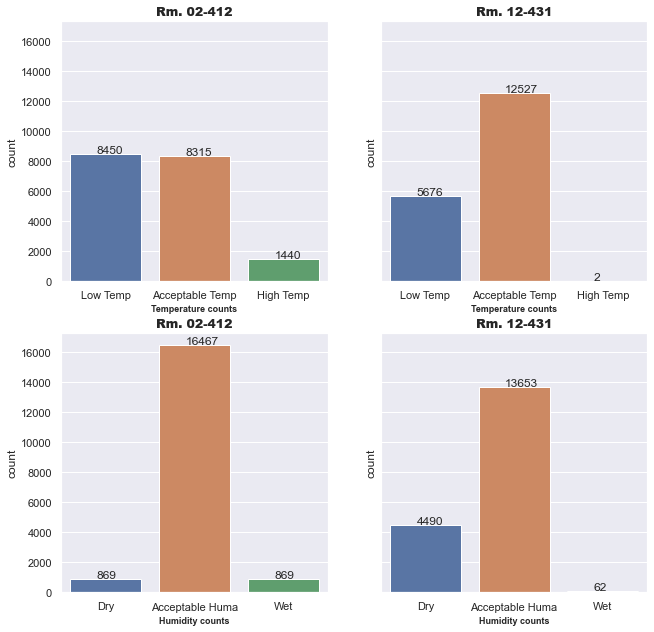

In [13]:
# 顯示所有溫度和濕度分類的數目分佈
sns.set(rc={'figure.figsize':(10.5,10.5)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True)

# 繪製圖表
ax1 = sns.countplot(x='Temp_cats_02_412', data=all_Temp_Huma, ax=ax1)
ax2 = sns.countplot(x='Temp_cats_12_431', data=all_Temp_Huma, ax=ax2)
ax3 = sns.countplot(x='Huma_cats_02_412', data=all_Temp_Huma, ax=ax3)
ax4 = sns.countplot(x='Huma_cats_12_431', data=all_Temp_Huma, ax=ax4)

# 編輯圖表的外觀
ax1.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax2.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')
ax3.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax4.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')

ax1.set_xlabel('Temperature counts', fontsize=9, fontweight ='bold')
ax2.set_xlabel('Temperature counts', fontsize=9, fontweight ='bold')
ax3.set_xlabel('Humidity counts', fontsize=9, fontweight ='bold')
ax4.set_xlabel('Humidity counts', fontsize=9, fontweight ='bold')

# 在柱狀圖上加註釋
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax4.patches:
        ax4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

print(all_Temp_Huma['Temp_cats_02_412'].value_counts(normalize=True), '\n\n', 
      all_Temp_Huma['Temp_cats_12_431'].value_counts(normalize=True), '\n\n', 
      all_Temp_Huma['Huma_cats_02_412'].value_counts(normalize=True), '\n\n', 
      all_Temp_Huma['Huma_cats_12_431'].value_counts(normalize=True))

plt.show()

### 對類別柱狀計數圖的調查結果


除了顯著的「低溫」類別數目，房間02-412 亦有 1440 個 「高溫」（約8％）及 869 條「潮濕」（4.77％）類的記錄（對應早前趨勢圖表的 2021 年 5 月 上半月部分）。而房間12-431 的同類記錄的數目則可忽視。

接下來，我們將嘗試把房間內溫度和濕度之間的關係可視化。

r^2 = 0.145


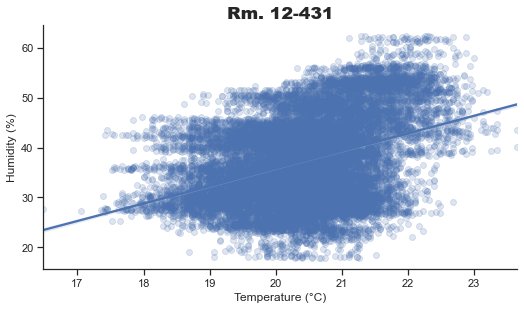

In [14]:
# 為房間12.431 的濕度與溫度繪製散點圖（scatterplot）及回歸線（regression line）
from sklearn.linear_model import LinearRegression 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 4.5)

x=Temp_Cel_Huma_12_431['Temperature (°C)']
y=Temp_Cel_Huma_12_431['Humidity (%)']

# 繪製圖表
sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.18})
ax.set_title('Rm. 12-431', fontsize=17.5, fontweight ='heavy')

# 計算 r^2 值
lin_reg = LinearRegression().fit(Temp_Cel_Huma_12_431[['Temperature (°C)']], Temp_Cel_Huma_12_431['Humidity (%)'])
r2 = lin_reg.score(Temp_Cel_Huma_12_431[['Temperature (°C)']], Temp_Cel_Huma_12_431['Humidity (%)'])

print(f'r^2 = {round(r2,3)}')
sns.despine()

plt.show()

### 濕度與溫度的線性回歸圖的調查結果
r^2 值（擬合優度/決定系數）小於 0.4，表示溫度及濕度之間的相關性較弱。

（根據 https://www.investopedia.com/terms/r/r-squared.asp ，r^2 大於 0.7 為強相關性）

## 5. 採用「pythermalcomfort」工具包運算「pmv & ppd」指數及可視化

接下來，採用第三方python工具包 - 「pythermalcomfort」進行熱舒適度分析。

一個時隙必須滿足以下條件，方可被定義為「舒適」的室內環境：

 - -0.5 <= pmv <=0.5
 - ppd <= 10%
 
https://www.simscale.com/blog/2019/09/what-is-pmv-ppd/

在數據幀「all_Temp_Huma」中分別創建包含「pmv & ppd」指數的運算結果的新列，然後作進一步的處理。

### 如欲深入了解有關「熱舒適」的理論及「pythermalcomfort」工具包的資料，請參閱「（中文）README.md」。

In [40]:
'''
!!!不要再次運行此單元格。
'''
# # import sys to install pythermalcomfort
# import sys
# !{sys.executable} -m pip install pythermalcomfort

  Using cached pythermalcomfort-1.10.0-py2.py3-none-any.whl (42 kB)
  Using cached jos3-0.2.6-py3-none-any.whl (27 kB)


In [15]:
# 導入 pythermalcomfort 工具包並檢查其內容
import pythermalcomfort
help(pythermalcomfort)

Help on package pythermalcomfort:

NAME
    pythermalcomfort

PACKAGE CONTENTS
    __main__
    cli
    models
    optimized_functions
    psychrometrics
    utilities

VERSION
    __version__ = '1.10.0'

FILE
    c:\anaconda3\lib\site-packages\pythermalcomfort\__init__.py




In [17]:
# 使用第一行數據測試「pythermalcomfort」工具包 - temp(溫度) = 22.45 °C 和 huma(濕度) = 59.56 % (2021-05-01 00:05:11)
from pythermalcomfort.models import pmv_ppd

warnings.filterwarnings('ignore')  # 運行此單元兩次以忽視警告

# 根據假設定義變量 - 運行溫度，相對濕度，風速，新陳代謝率，服裝熱阻
date = all_Temp_Huma['Date & Time'].iloc[0]
test_op_temp = all_Temp_Huma['Temperature (°C)_02_412'].iloc[0]
air_spd_r = 0.1 # 模擬簡單的傳熱計算
test_rh = all_Temp_Huma['Humidity (%)_02_412'].iloc[0]
met = 1.1 # 打字，兩個房間的使用者的典型工作
clo = 1 # 典型的冬季室內服裝
wme = 0
standard = 'ASHRAE'

# 假設平均輻射溫度（如室內物件溫度） = 空氣溫度，因此 tdb = tr
test_results = pmv_ppd(tdb=test_op_temp, tr=test_op_temp, vr=air_spd_r, rh=test_rh, met=met, clo=clo, wme=wme, standard=standard)

# print(test_results['pmv'])
print(f"Date & Time: {date}, pmv: {test_results['pmv']}, ppd: {test_results['ppd']}.")

Date & Time: 2021-05-01 00:05:11, pmv: 0.07, ppd: 5.1.


In [18]:
# 計算所有 pmv & ppd 指數並創建新列
all_Temp_Huma['pmv & ppd_02_412'] = all_Temp_Huma.apply(lambda x: pmv_ppd(x['Temperature (°C)_02_412'], x['Temperature (°C)_02_412'], air_spd_r, 
                                                        x['Humidity (%)_02_412'], met, clo, wme, standard), axis=1)

all_Temp_Huma['pmv & ppd_12_431'] = all_Temp_Huma.apply(lambda x: pmv_ppd(x['Temperature (°C)_12_431'], x['Temperature (°C)_12_431'], air_spd_r, 
                                                        x['Humidity (%)_12_431'], met, clo, wme, standard), axis=1)

warnings.filterwarnings(action='ignore')

all_Temp_Huma

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431,pmv & ppd_02_412,pmv & ppd_12_431
0,2021-05-01 00:05:11,22.45,59.56,Acceptable Temp,Acceptable Huma,21.58,54.02,Acceptable Temp,Acceptable Huma,"{'pmv': 0.07, 'ppd': 5.1}","{'pmv': -0.18, 'ppd': 5.6}"
1,2021-05-01 00:12:14,22.61,59.52,Acceptable Temp,Acceptable Huma,21.16,54.18,Acceptable Temp,Acceptable Huma,"{'pmv': 0.11, 'ppd': 5.3}","{'pmv': -0.28, 'ppd': 6.6}"
2,2021-05-01 00:19:19,21.97,59.66,Acceptable Temp,Acceptable Huma,22.39,54.23,Acceptable Temp,Acceptable Huma,"{'pmv': -0.05, 'ppd': 5.0}","{'pmv': 0.02, 'ppd': 5.0}"
3,2021-05-01 00:26:22,21.55,59.94,Acceptable Temp,Acceptable Huma,22.16,54.27,Acceptable Temp,Acceptable Huma,"{'pmv': -0.15, 'ppd': 5.4}","{'pmv': -0.03, 'ppd': 5.0}"
4,2021-05-01 00:33:26,22.81,59.78,Acceptable Temp,Acceptable Huma,21.87,54.25,Acceptable Temp,Acceptable Huma,"{'pmv': 0.16, 'ppd': 5.5}","{'pmv': -0.11, 'ppd': 5.2}"
...,...,...,...,...,...,...,...,...,...,...,...
18200,2021-07-30 23:25:03,19.68,35.10,Low Temp,Acceptable Huma,19.00,29.47,Low Temp,Dry,"{'pmv': -0.74, 'ppd': 16.4}","{'pmv': -0.92, 'ppd': 23.0}"
18201,2021-07-30 23:32:07,22.52,34.74,Acceptable Temp,Acceptable Huma,19.32,29.34,Low Temp,Dry,"{'pmv': -0.08, 'ppd': 5.1}","{'pmv': -0.85, 'ppd': 20.3}"
18202,2021-07-30 23:39:11,18.39,33.73,Low Temp,Acceptable Huma,19.26,28.77,Low Temp,Dry,"{'pmv': -1.04, 'ppd': 27.9}","{'pmv': -0.87, 'ppd': 20.9}"
18203,2021-07-30 23:46:15,21.06,33.00,Acceptable Temp,Acceptable Huma,19.45,28.44,Low Temp,Dry,"{'pmv': -0.43, 'ppd': 8.8}","{'pmv': -0.83, 'ppd': 19.4}"


In [19]:
# 將舊的「pmv & ppd」列拆分為單獨的「pmv」和「ppd」新列、然後刪除，再根據房間號對所有列重新排序
all_Temp_Huma = pd.concat([all_Temp_Huma.drop(['pmv & ppd_02_412'], axis=1), all_Temp_Huma['pmv & ppd_02_412'].apply(pd.Series)], axis=1)
all_Temp_Huma = pd.concat([all_Temp_Huma.drop(['pmv & ppd_12_431'], axis=1), all_Temp_Huma['pmv & ppd_12_431'].apply(pd.Series)], axis=1)

new_cols = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'Temperature (°C)_12_431', 
            'Humidity (%)_12_431', 'Temp_cats_12_431', 'Huma_cats_12_431', 'pmv_02_412', 'ppd_02_412', 'pmv_12_431', 'ppd_12_431']

# 重新命名列
all_Temp_Huma.columns = new_cols

# 重新排序列
new_cols_ordered = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'pmv_02_412', 'ppd_02_412', 
                    'Temperature (°C)_12_431', 'Humidity (%)_12_431', 'Temp_cats_12_431', 'Huma_cats_12_431', 'pmv_12_431', 'ppd_12_431']

all_Temp_Huma = all_Temp_Huma[new_cols_ordered]

In [20]:
# 檢查數據幀在「pmv」和「ppd」列分開時的形狀和外觀
print(all_Temp_Huma.shape)
all_Temp_Huma.sample(5)

(18205, 13)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431,pmv_12_431,ppd_12_431
6527,2021-06-02 16:42:55,20.68,43.76,Acceptable Temp,Acceptable Huma,-0.45,9.3,21.48,37.32,Acceptable Temp,Acceptable Huma,-0.30,6.9
15063,2021-07-15 08:19:38,18.39,49.10,Low Temp,Acceptable Huma,-0.96,24.6,20.39,41.50,Acceptable Temp,Acceptable Huma,-0.54,11.0
1281,2021-05-07 10:52:18,22.77,64.05,Acceptable Temp,Wet,0.18,5.7,22.42,54.20,Acceptable Temp,Acceptable Huma,0.03,5.0
11848,2021-06-29 05:36:45,17.74,47.17,Low Temp,Acceptable Huma,-1.13,31.8,19.26,40.22,Low Temp,Acceptable Huma,-0.81,18.7
10777,2021-06-23 21:38:36,22.84,43.88,Acceptable Temp,Acceptable Huma,0.06,5.1,20.65,37.43,Acceptable Temp,Acceptable Huma,-0.50,10.2


In [21]:
# 同樣，對「pmv」和「ppd」指數進行分類，檢查列的數據類型和每個類別的數目比例
pmv_low=-0.5
pmv_neu=0.5
ppd_sat=10

all_Temp_Huma['pmv_cats_02_412'] = np.where(all_Temp_Huma['pmv_02_412']<pmv_low,'Cool/Cold', np.where(all_Temp_Huma['pmv_02_412']<=pmv_neu, 'Neutral', 'Warm/Hot'))
all_Temp_Huma['pmv_cats_02_412'] = pd.Series(all_Temp_Huma['pmv_cats_02_412'], dtype='category')

all_Temp_Huma['ppd_cats_02_412'] = np.where(all_Temp_Huma['ppd_02_412']<=ppd_sat,'Satisfied', 'Dissatisfied')
all_Temp_Huma['ppd_cats_02_412'] = pd.Series(all_Temp_Huma['ppd_cats_02_412'], dtype='category')

all_Temp_Huma['pmv_cats_12_431'] = np.where(all_Temp_Huma['pmv_12_431']<pmv_low,'Cool/Cold', np.where(all_Temp_Huma['pmv_12_431']<=pmv_neu, 'Neutral', 'Warm/Hot'))
all_Temp_Huma['pmv_cats_12_431'] = pd.Series(all_Temp_Huma['pmv_cats_12_431'], dtype='category')

all_Temp_Huma['ppd_cats_12_431'] = np.where(all_Temp_Huma['ppd_12_431']<=ppd_sat,'Satisfied', 'Dissatisfied')
all_Temp_Huma['ppd_cats_12_431'] = pd.Series(all_Temp_Huma['ppd_cats_12_431'], dtype='category')

# 重新排序列
new_cols_ordered_2 = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'pmv_02_412', 
                      'ppd_02_412', 'pmv_cats_02_412', 'ppd_cats_02_412', 'Temperature (°C)_12_431', 'Humidity (%)_12_431', 
                      'Temp_cats_12_431', 'Huma_cats_12_431', 'pmv_12_431', 'ppd_12_431', 'pmv_cats_12_431', 'ppd_cats_12_431']

all_Temp_Huma = all_Temp_Huma.reindex(new_cols_ordered_2, axis=1)

print(all_Temp_Huma.dtypes, '\n\n', 
      round(all_Temp_Huma['pmv_cats_02_412'].value_counts(normalize = True), 3), '\n\n', 
      round(all_Temp_Huma['ppd_cats_02_412'].value_counts(normalize = True), 3), '\n\n',
      round(all_Temp_Huma['pmv_cats_12_431'].value_counts(normalize = True), 3), '\n\n',
      round(all_Temp_Huma['ppd_cats_12_431'].value_counts(normalize = True), 3))

Date & Time                datetime64[ns]
Temperature (°C)_02_412           float64
Humidity (%)_02_412               float64
Temp_cats_02_412                 category
Huma_cats_02_412                 category
pmv_02_412                        float64
ppd_02_412                        float64
pmv_cats_02_412                  category
ppd_cats_02_412                  category
Temperature (°C)_12_431           float64
Humidity (%)_12_431               float64
Temp_cats_12_431                 category
Huma_cats_12_431                 category
pmv_12_431                        float64
ppd_12_431                        float64
pmv_cats_12_431                  category
ppd_cats_12_431                  category
dtype: object 

 Cool/Cold    0.530
Neutral      0.436
Warm/Hot     0.034
Name: pmv_cats_02_412, dtype: float64 

 Dissatisfied    0.575
Satisfied       0.425
Name: ppd_cats_02_412, dtype: float64 

 Cool/Cold    0.572
Neutral      0.428
Name: pmv_cats_12_431, dtype: float64 

 Dissati

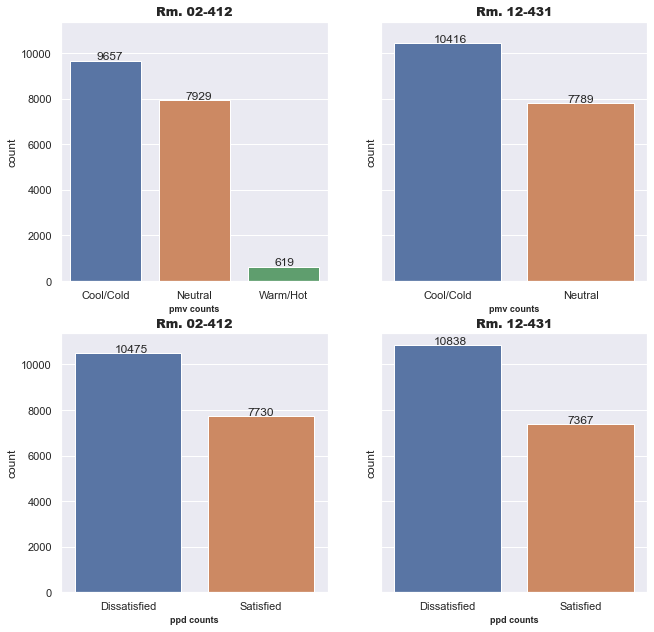

In [22]:
# 同樣為「pmv」和「ppd」指數的類別繪製柱狀計數圖
sns.set(rc={'figure.figsize':(10.5,10.5)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True)

# 繪製圖表
ax1 = sns.countplot(x='pmv_cats_02_412', data=all_Temp_Huma, ax=ax1)
ax2 = sns.countplot(x='pmv_cats_12_431', data=all_Temp_Huma, ax=ax2)
ax3 = sns.countplot(x='ppd_cats_02_412', data=all_Temp_Huma, ax=ax3)
ax4 = sns.countplot(x='ppd_cats_12_431', data=all_Temp_Huma, ax=ax4)

# 編輯圖表的外觀
ax1.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax2.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')
ax3.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax4.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')

ax1.set_xlabel('pmv counts', fontsize=9, fontweight ='bold')
ax2.set_xlabel('pmv counts', fontsize=9, fontweight ='bold')
ax3.set_xlabel('ppd counts', fontsize=9, fontweight ='bold')
ax4.set_xlabel('ppd counts', fontsize=9, fontweight ='bold')

# 在柱狀圖上加註釋
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax4.patches:
        ax4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

plt.show()

### 對類別柱狀計數圖的調查結果

縱使早前的柱狀圖顯示，房間12-431中，「可接受的溫度」（Acceptable temp）及「可接受的濕度」（Acceptable huma）的數據類別佔多數，兩個房間仍均有更多的「涼/冷」（cool/cold）時隙，亦很有可能只有不到 80% 的使用者在超過一半的時隙感到「滿意」（ppd>10%）

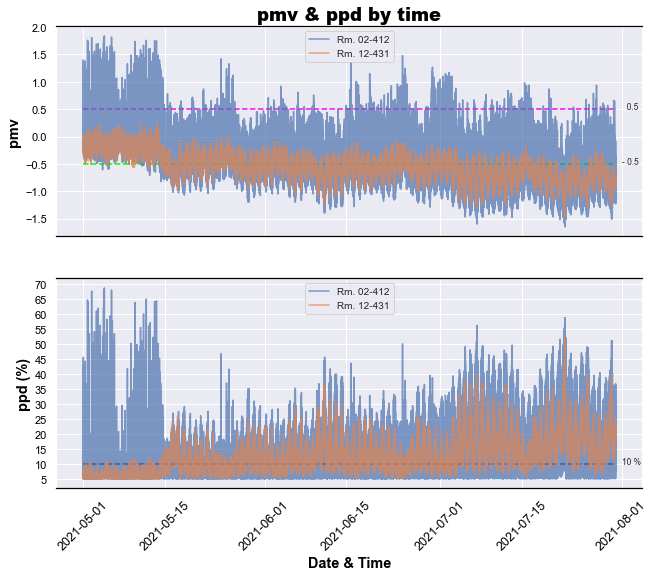

In [23]:
# 兩個房間的「日期和時間」相對「pmv」和「ppd」指數的可視化，以及它們的界線
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

fig.set_size_inches(10.5, 8.5)

# 編輯圖表的外觀
ax1.set_title('pmv & ppd by time', color=colour_2, fontsize=18, fontweight='heavy')
ax1.spines['bottom'].set_color(colour_2)
ax1.spines['top'].set_color(colour_2)
ax1.set_ylabel('pmv', fontweight ='bold', color = colour_2, fontsize=14.5)
ax1.tick_params(colors=colour_2)
ax1.grid(True)
ax1.locator_params('y', nbins=15)

ax2.spines['bottom'].set_color(colour_2)
ax2.spines['top'].set_color(colour_2)
ax2.set_xlabel('Date & Time', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.set_ylabel('ppd (%)', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.tick_params(colors=colour_2)
ax2.grid(True)
ax2.locator_params('y', nbins=15)

plt.xticks(rotation = 45, fontsize=12.5)

# 繪製圖表
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['pmv_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['pmv_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax1.legend(fontsize='medium', loc=9)
ax1.hlines(y=pmv_low, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='lime', linestyles='dashed')
ax1.hlines(y=pmv_neu, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='magenta', linestyles='dashed')
ax1.text('2021-08-01', pmv_low,'- 0.5', fontsize='small')
ax1.text('2021-08-01', pmv_neu,'  0.5', fontsize='small')

ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['ppd_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['ppd_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax2.legend(fontsize='medium', loc=9)
ax2.hlines(y=ppd_sat, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='darkred', linestyles='dashed')

ax2.text('2021-08-01', ppd_sat,'10 %', fontsize='small')

plt.show()

### 趨勢調查結果

- 使用者更有可能在 2021 年 5 月上半月感受到「溫暖/炎熱」（秋季，pmv 大於 0.5 及 ppd 大於 10%）


- 從 2021 年 5 月中旬左右開始，pmv 指數開始逐漸下降到 - 0.5 以下，直到 7 月下旬（冬季）；同期的 ppd 指數也逐漸上升，表明室內熱舒適程度更令人不滿意。

# 您是否注意到「溫度與日期和時間」圖表看起來與「pmv 與日期和時間」圖表幾乎相同！？

這可能意味著，儘管熱舒適度取決於多個因素，在這種情況下，溫度對 pmv 指數有更大影響。

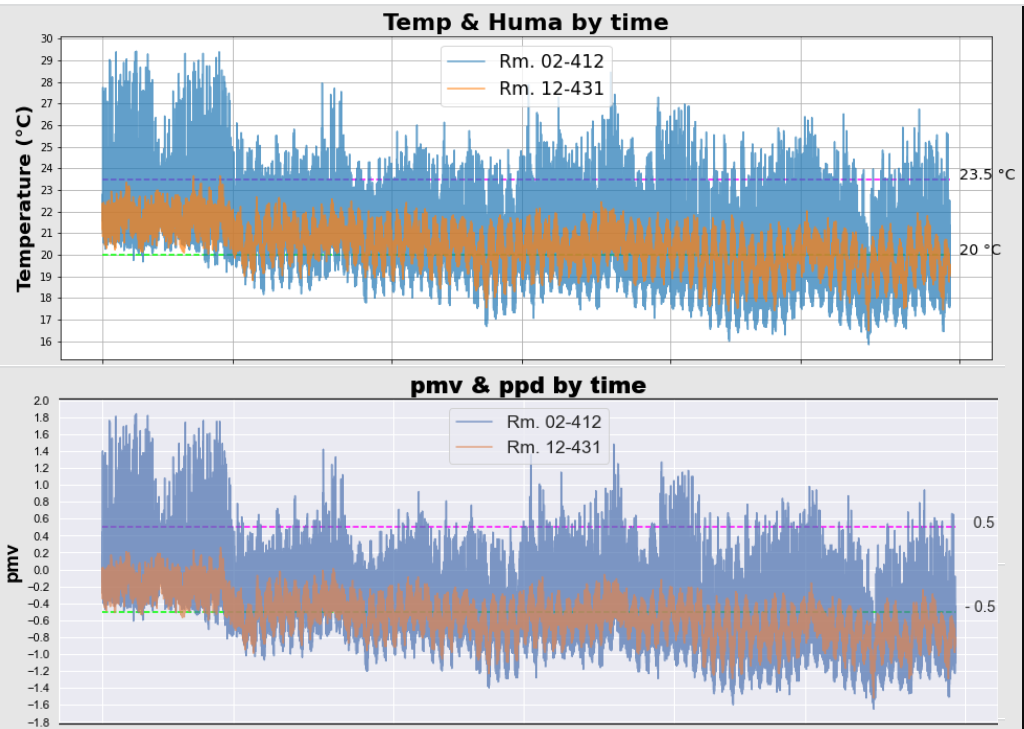

r^2 = 0.988


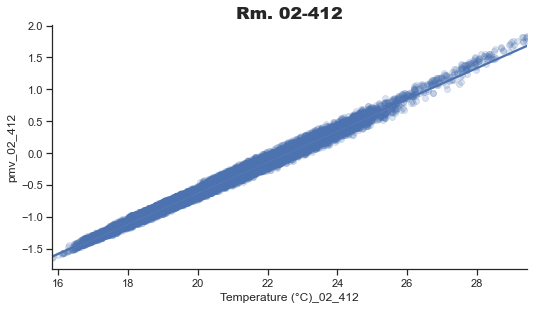

In [24]:
# 為房間02-412 的濕度與pmv指數繪製散點圖（scatterplot）及回歸線（regression line）
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 4.5)

x=all_Temp_Huma['Temperature (°C)_02_412']
y=all_Temp_Huma['pmv_02_412']

# 繪製圖表
sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.18})
ax.set_title('Rm. 02-412', fontsize=17.5, fontweight ='heavy')

# 計算 r^2 值
lin_reg = LinearRegression().fit(all_Temp_Huma[['Temperature (°C)_02_412']], all_Temp_Huma['pmv_02_412'])
r2 = lin_reg.score(all_Temp_Huma[['Temperature (°C)_02_412']], all_Temp_Huma['pmv_02_412'])

print(f'r^2 = {round(r2,3)}')
sns.despine()

plt.show()

### 溫度與pmv指數線性回歸圖的調查結果
r^2 值 大於 0.7 表示兩者之間有強相關性

## 6. 在房間02-412最初給人「暖/熱」（Warm/Hot）感覺的時隙中，採用新的衣服熱阻（clo）值


我們將衣服熱阻（clo）更改為0.61 clo，相當於假設居住者只是簡單地從「典型的冬季室內服裝」改穿「褲子和長袖襯衫」，然後根據新運算的 pmv 和 ppd 指數，分別檢查不再給使用者帶來「暖/熱」和「不滿意」感覺的時隙比例。

In [25]:
# 整理出「暖/熱」的時隙（pmv > 0.5）
high_pmv_02_412 = all_Temp_Huma.loc[all_Temp_Huma['pmv_02_412']>pmv_neu]

num_sort=500

cols_02_412 = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 
               'Huma_cats_02_412', 'pmv_02_412', 'ppd_02_412', 'pmv_cats_02_412', 'ppd_cats_02_412']

# 再對 500 個 pmv 值最低的時間段進行排序，並重置數據幀索引
high_ppd_02_412_500th = high_pmv_02_412[cols_02_412].nsmallest(num_sort,'pmv_02_412').sort_values(by='Date & Time')
high_ppd_02_412_500th.reset_index(drop=True, inplace=True)

print(high_ppd_02_412_500th.shape)
high_ppd_02_412_500th.head()

(500, 9)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied


In [26]:
# 再三確認它們是「暖/熱」的時隙，若正確結果將為空
display(high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_cats_02_412']!='Warm/Hot'])
display(high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_cats_02_412']!='Dissatisfied'])
print(high_ppd_02_412_500th[['pmv_02_412', 'ppd_02_412']].describe())

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412


       pmv_02_412  ppd_02_412
count  500.000000  500.000000
mean     0.709400   16.249200
std      0.176859    5.994304
min      0.510000   10.400000
25%      0.570000   11.875000
50%      0.650000   13.800000
75%      0.810000   18.850000
max      1.160000   33.400000


In [27]:
# 應用新的衣服熱阻（clo）值，看看使用者是否可以通過脫掉「典型的冬季室內服裝」而獲得可接受的「pmv」和「ppd」指數
clo_new = 0.61 # 「褲子和長袖襯衫」

high_ppd_02_412_500th['pmv & ppd_02_412_new'] = high_ppd_02_412_500th.apply(lambda x: pmv_ppd(x['Temperature (°C)_02_412'], 
                                                                                              x['Temperature (°C)_02_412'], 
                                                                                              air_spd_r, x['Humidity (%)_02_412'], 
                                                                                              met, clo_new, wme, standard), axis=1)

high_ppd_02_412_500th = pd.concat([high_ppd_02_412_500th.drop(['pmv & ppd_02_412_new'], axis=1), 
                                   high_ppd_02_412_500th['pmv & ppd_02_412_new'].apply(pd.Series)], axis=1)

new_cols_hot_02_412_new_clo = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'pmv_02_412', 
                               'ppd_02_412', 'pmv_cats_02_412', 'ppd_cats_02_412', 'pmv_02_412_new_clo', 'ppd_02_412_new_clo']

high_ppd_02_412_500th.columns = new_cols_hot_02_412_new_clo

In [28]:
# 檢查帶有新的「pmv」和「ppd」列的數據幀的形狀和外觀
print(high_ppd_02_412_500th.shape)
high_ppd_02_412_500th.sample(5)

(500, 11)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
162,2021-05-12 10:04:53,26.61,54.79,High Temp,Acceptable Huma,1.07,29.3,Warm/Hot,Dissatisfied,0.62,13.0
94,2021-05-08 01:14:32,24.65,61.69,High Temp,Wet,0.63,13.4,Warm/Hot,Dissatisfied,0.06,5.1
168,2021-05-12 19:30:18,24.90,59.16,High Temp,Acceptable Huma,0.68,14.7,Warm/Hot,Dissatisfied,0.12,5.3
100,2021-05-08 03:57:07,26.26,61.50,High Temp,Wet,1.04,27.8,Warm/Hot,Dissatisfied,0.56,11.7
139,2021-05-10 12:43:40,26.16,49.05,High Temp,Acceptable Huma,0.91,22.6,Warm/Hot,Dissatisfied,0.43,8.9


In [29]:
# 檢查其中不再給使用者帶來「暖/熱」和「不滿意」感覺的時隙數量
improved_pmv_02_412 = high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_02_412_new_clo']<=pmv_neu]
improved_ppd_02_412 = high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_02_412_new_clo']<=ppd_sat]
display(improved_pmv_02_412, improved_ppd_02_412)
print(high_ppd_02_412_500th[['pmv_02_412_new_clo', 'ppd_02_412_new_clo']].describe())

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied,0.01,5.0
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied,0.09,5.2
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied,0.25,6.2
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied,-0.01,5.0
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.10,5.2
...,...,...,...,...,...,...,...,...,...,...,...
495,2021-07-29 13:00:23,25.29,26.24,High Temp,Dry,0.52,10.7,Warm/Hot,Dissatisfied,-0.01,5.0
496,2021-07-29 14:53:26,25.55,24.18,High Temp,Dry,0.57,11.7,Warm/Hot,Dissatisfied,0.05,5.0
497,2021-07-30 15:38:08,25.65,33.23,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.15,5.5
498,2021-07-30 17:17:07,25.39,36.73,High Temp,Acceptable Huma,0.63,13.2,Warm/Hot,Dissatisfied,0.10,5.2


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied,0.01,5.0
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied,0.09,5.2
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied,0.25,6.2
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied,-0.01,5.0
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.10,5.2
...,...,...,...,...,...,...,...,...,...,...,...
495,2021-07-29 13:00:23,25.29,26.24,High Temp,Dry,0.52,10.7,Warm/Hot,Dissatisfied,-0.01,5.0
496,2021-07-29 14:53:26,25.55,24.18,High Temp,Dry,0.57,11.7,Warm/Hot,Dissatisfied,0.05,5.0
497,2021-07-30 15:38:08,25.65,33.23,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.15,5.5
498,2021-07-30 17:17:07,25.39,36.73,High Temp,Acceptable Huma,0.63,13.2,Warm/Hot,Dissatisfied,0.10,5.2


       pmv_02_412_new_clo  ppd_02_412_new_clo
count          500.000000          500.000000
mean             0.175980            6.639200
std              0.218039            2.768558
min             -0.100000            5.000000
25%              0.010000            5.000000
50%              0.100000            5.200000
75%              0.312500            7.025000
max              0.740000           16.500000


In [30]:
# 計算採用新 clo 值運算後，pmv 和 ppd 指數的改進 %
improved_pmv_02_412_percentage = len(improved_pmv_02_412) / len(high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_cats_02_412']=='Warm/Hot']) * 100
improved_ppd_02_412_percentage = len(improved_ppd_02_412) / len(high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_cats_02_412']=='Dissatisfied']) * 100
print('With new clo value,')
print(f'pmv in Rm.02.412 improved by {improved_pmv_02_412_percentage} %')
print(f'ppd in Rm.02.412 improved by {improved_ppd_02_412_percentage} %')

With new clo value,
pmv in Rm.02.412 improved by 88.6 %
ppd in Rm.02.412 improved by 87.8 %


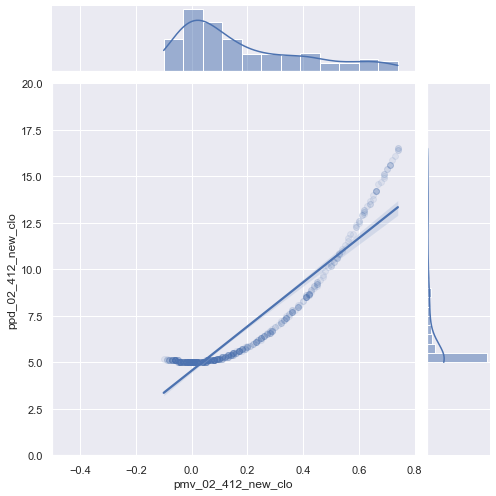

In [31]:
# 檢查新的 pmv 及 ppd 指數之間的關係
sns.set_style('darkgrid')
sns.jointplot(x='pmv_02_412_new_clo', y='ppd_02_412_new_clo', data=high_ppd_02_412_500th, kind='reg', 
              height=7, xlim=[-0.5,0.8], ylim=[0,20], palette='BrBG_r', scatter_kws={'alpha':0.09})

### 對已改進的 ppd 與 pmv 指數的關係的調查結果（jointplot）

- 超過 87% 的時隙不會再給使用者帶來「暖/熱」的感覺，假設他們僅僅選擇在相同的室內環境條件下脫掉衣服。


- 除了在上面的關係圖中 pmv 約 -0.1 到 0.3 及 ppd 約 5.0 到 6.3 的範圍內有高密度的數據點外，pmv 及 ppd 指數之間亦形成了很強的非線性相關性。

## 7. 結論

除了可持續性特徵外，'溫度'、'濕度'、'氧氣'和'空氣污染物濃度'等環境參數在室內建築環境的整體評估過程中也起著至關重要的作用。

當能源/自然資源消耗保持在最低限度時，必須通過某種方式藉改善空調系統、通風等室內環境因素進行分析和優化，以有利於使用者的體驗，從而體現歷史數據的真實價值，如本項目中使用的數據。